In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import sys
from tqdm import tqdm

In [3]:
api_key_fpath = Path("eia-api-key.txt")
with open(api_key_fpath, "r") as file:
    api_key = file.readlines()[0].strip('/n')

In [4]:
from gridstatus import EIA

# EIA - MISO Data

Get demand data for MISO from 2023

In [5]:
eia = EIA(api_key)

In [41]:
data_route = 'electricity/rto/region-data'
dataset = eia.get_dataset(data_route,
                          start="2023-01-01",
                          end="2024-01-01",
                          facets={'respondent':'MISO',
                                  'type':['D']},
                          n_workers=4,
                          verbose=True).reset_index(drop=True)

Fetching data from https://api.eia.gov/v2/electricity/rto/region-data/data/
Params: {'start': '2023-01-01T00', 'end': '2024-01-01T00', 'frequency': 'hourly', 'data': ['value'], 'facets': {'respondent': ['MISO'], 'type': ['D']}, 'offset': 0, 'length': 5000, 'sort': [{'column': 'period', 'direction': 'asc'}, {'column': 'respondent', 'direction': 'asc'}, {'column': 'type', 'direction': 'asc'}]}
Concurrent workers: 4
Total records: 8761
Total pages: 2
Fetching data:


100%|█████████████████████████████████████████████| 2/2 [00:01<00:00,  1.96it/s]


In [42]:
dataset.shape

(8761, 5)

In [43]:
dataset.set_index("Interval End", drop=True, inplace=True)
dataset.drop(columns=['Interval Start','Respondent Name', 'Respondent'], inplace=True)
dataset.head()

,Load
Interval End,
2023-01-01 00:00:00+00:00,70159.0
2023-01-01 01:00:00+00:00,69592.0
2023-01-01 02:00:00+00:00,68133.0
2023-01-01 03:00:00+00:00,66497.0
2023-01-01 04:00:00+00:00,64874.0


In [44]:
dataset=dataset.iloc[:8760, :]

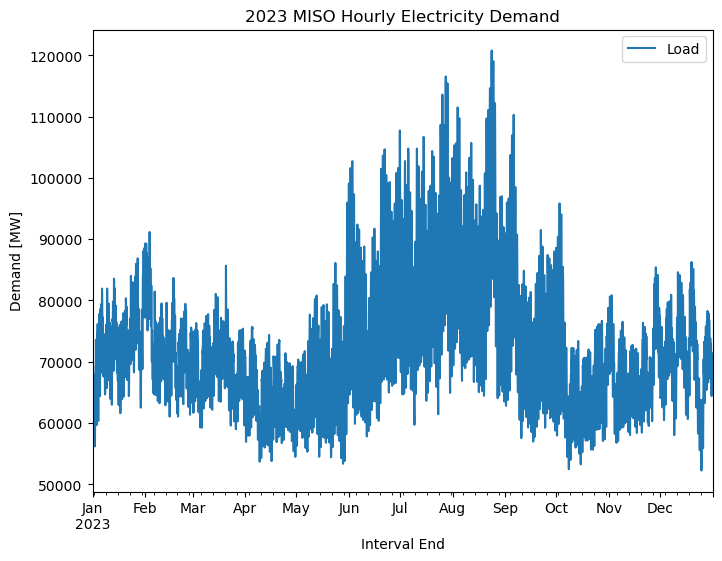

In [47]:
fig, ax = plt.subplots(figsize=(8,6), facecolor='w')
dataset.plot(ax=ax)
ax.set_ylabel("Demand [MW]")
ax.set_title("2023 MISO Hourly Electricity Demand")
plt.savefig("2023-miso-demand.png", dpi=400)

In [48]:
dataset.to_csv(".\\2023-miso-demand.csv")